In [2]:
import pickle

with open("test", "rb") as fp:   # Unpickling
       b = pickle.load(fp)

In [3]:
b

[{'K': 5,
  'alpha': 0.1,
  'beta': 0.05,
  'perplexity': -10.922839731065798,
  'coherence': -1.5727219083178974},
 {'K': 5,
  'alpha': 0.1,
  'beta': 0.1,
  'perplexity': -7.63173339832783,
  'coherence': -2.9800441080309126},
 {'K': 5,
  'alpha': 0.1,
  'beta': 0.5,
  'perplexity': -7.489285403517213,
  'coherence': -5.418082819226079},
 {'K': 5,
  'alpha': 0.5,
  'beta': 0.05,
  'perplexity': -10.885930015189638,
  'coherence': -1.4859220856742021},
 {'K': 5,
  'alpha': 0.5,
  'beta': 0.1,
  'perplexity': -7.592001705316572,
  'coherence': -1.6987841696638057},
 {'K': 5,
  'alpha': 0.5,
  'beta': 0.5,
  'perplexity': -7.568012958884364,
  'coherence': -2.694869429763639},
 {'K': 5,
  'alpha': 1,
  'beta': 0.05,
  'perplexity': -10.882249908965623,
  'coherence': -1.5142221293521214},
 {'K': 5,
  'alpha': 1,
  'beta': 0.1,
  'perplexity': -7.582543071271905,
  'coherence': -1.7091368495126873},
 {'K': 5,
  'alpha': 1,
  'beta': 0.5,
  'perplexity': -7.59491908022188,
  'coherence': 

## Text pre-processing

In [3]:
import pandas as pd
import spacy

In [3]:
# Import data
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.head(5)

,airline,ratingValue,author,country,reviewText,verified,type_of_traveller,cabin_flown,date_flown,seat_comfort,...,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity,is_english,year_flown,continent,reviewText_char_count,period
0,TAP Portugal,7,594f7ce5800c4faff13c0518221598fafc95fe7822c1d9...,United Kingdom,Used TAP from LGW as no direct flight from Hea...,True,Couple Leisure,Business Class,May 2023,3.0,...,4.0,3.0,4.0,NaN,NaN,1,2023,Europe,1007,1
1,TAP Portugal,1,aced8334e429b631298259865985f84fedeb92b8e78e98...,Belgium,There were enough counters to check in for bus...,True,Business,Business Class,May 2023,1.0,...,1.0,2.0,1.0,NaN,NaN,1,2023,Europe,747,1
2,TAP Portugal,1,d16285a68ac162b25216d8ed7470985fc6ce8c4682edf2...,United States,I have never encountered such incompetency. Wh...,True,Solo Leisure,Economy Class,May 2023,1.0,...,1.0,1.0,1.0,1.0,1.0,1,2023,North America,855,1
3,TAP Portugal,4,f9e3269773ef1a6724344b180c05776345006cfb8d89f1...,Portugal,The flight was in the morning and on time. The...,True,Business,Economy Class,May 2023,1.0,...,2.0,3.0,2.0,1.0,1.0,1,2023,Europe,262,1
4,TAP Portugal,1,625c592ca227e3251c6538be78698192dc23133f37e052...,Portugal,The flight was cancelled 1hr before departure....,True,Family Leisure,Economy Class,October 2022,1.0,...,NaN,1.0,1.0,NaN,NaN,1,2022,Europe,329,1


##### 1. Lowercase

##### 2. Tokenization

##### 3. Lemmatization

##### 4. Removing stopwords

##### 5. Removing HTML

In [5]:
# Only remove URLs

import spacy
import html
import re

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    return text

# Assume `data` is the DataFrame containing the `reviewText` column
data["processed_review"] = data["reviewText"].apply(preprocess_text)

In [6]:
# Export data
data.to_csv('processed_data.csv', index=False)

In [7]:
data = pd.read_csv('processed_data.csv')

In [12]:
import pandas as pd
import re

# Create list
hashtags = []

# Iterate over each review in the 'processed_review' column
for review in data['processed_review']:
    hashtags_in_review = re.findall(r'\#\w+', review)
    hashtags.extend(hashtags_in_review)

# Print the extracted hashtags
print(hashtags)


['#826', '#1', '#2', '#3', '#68', '#8', '#7', '#2', '#1', '#2', '#180', '#4', '#3', '#307', '#307', '#3', '#1t', '#23', '#7', '#1', '#28', '#stopover', '#853']


In [38]:
data

,airline,ratingValue,author,country,reviewText,verified,type_of_traveller,cabin_flown,date_flown,seat_comfort,...,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity,is_english,year_flown,continent,reviewText_char_count,period,processed_review
0,TAP Portugal,7,594f7ce5800c4faff13c0518221598fafc95fe7822c1d9...,United Kingdom,Used TAP from LGW as no direct flight from Hea...,True,Couple Leisure,Business Class,May 2023,3.0,...,3.0,4.0,NaN,NaN,1,2023,Europe,1007,1,Used TAP from LGW as no direct flight from Hea...
1,TAP Portugal,1,aced8334e429b631298259865985f84fedeb92b8e78e98...,Belgium,There were enough counters to check in for bus...,True,Business,Business Class,May 2023,1.0,...,2.0,1.0,NaN,NaN,1,2023,Europe,747,1,There were enough counters to check in for bus...
2,TAP Portugal,1,d16285a68ac162b25216d8ed7470985fc6ce8c4682edf2...,United States,I have never encountered such incompetency. Wh...,True,Solo Leisure,Economy Class,May 2023,1.0,...,1.0,1.0,1.0,1.0,1,2023,North America,855,1,I have never encountered such incompetency. Wh...
3,TAP Portugal,4,f9e3269773ef1a6724344b180c05776345006cfb8d89f1...,Portugal,The flight was in the morning and on time. The...,True,Business,Economy Class,May 2023,1.0,...,3.0,2.0,1.0,1.0,1,2023,Europe,262,1,The flight was in the morning and on time. The...
4,TAP Portugal,1,625c592ca227e3251c6538be78698192dc23133f37e052...,Portugal,The flight was cancelled 1hr before departure....,True,Family Leisure,Economy Class,October 2022,1.0,...,1.0,1.0,NaN,NaN,1,2022,Europe,329,1,The flight was cancelled 1hr before departure....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,Icelandair,9,dd71104d341a017e1769e8d4aa21e37b05709800ef59ff...,Canada,We were pleasantly surprised with the value an...,True,Family Leisure,Economy Class,May 2016,5.0,...,5.0,5.0,4.0,NaN,1,2016,North America,1831,0,We were pleasantly surprised with the value an...
12634,Icelandair,3,00464b454ee14e48ef7c651996a3092084eb2aea1e4e41...,United States,Roundtrip Seattle to Keflavik in May/June 2016...,True,Solo Leisure,Business Class,June 2016,3.0,...,4.0,3.0,3.0,3.0,1,2016,North America,1187,0,Roundtrip Seattle to Keflavik in May/June 2016...
12635,Icelandair,8,7c0c82c9549788a948e7f6048cae712b3fdc2be7dbf9a8...,Canada,The flight from YVR to AMS was delayed by 2 ho...,True,Solo Leisure,Economy Class,May 2016,4.0,...,4.0,5.0,5.0,3.0,1,2016,North America,1759,0,The flight from YVR to AMS was delayed by 2 ho...
12636,Icelandair,7,c897250c8746c83859058d8a3b2fb7fe056b6be8bb67e6...,United States,We flew Washington Dulles to Reykjavik and bac...,True,Couple Leisure,Business Class,January 2016,3.0,...,4.0,4.0,3.0,4.0,1,2016,North America,556,0,We flew Washington Dulles to Reykjavik and bac...


### Sentiment classifier

In [8]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each processed review
compound_scores = []
overall_sentiments = []
sentiment_scores_list = []  # Added to store sentiment scores dictionaries

for review in data['processed_review']:
    scores = analyzer.polarity_scores(review)
    compound_scores.append(scores['compound'])
    
    # Classify overall sentiment based on the compound score
    if scores['compound'] >= 0.05:
        overall_sentiments.append('Positive')
    elif scores['compound'] <= -0.05:
        overall_sentiments.append('Negative')
    else:
        overall_sentiments.append('Neutral')
    
    sentiment_scores_list.append(scores)  # Store sentiment scores dictionary

# Add the new columns to the dataset
data['compound_score'] = compound_scores
data['overall_sentiment'] = overall_sentiments
data['sentiment_scores'] = sentiment_scores_list  # Add sentiment scores dictionary column

# Save the updated dataset
data.to_csv('updated_dataset.csv', index=False)


In [9]:
data.head(5)

,airline,ratingValue,author,country,reviewText,verified,type_of_traveller,cabin_flown,date_flown,seat_comfort,...,wifi_and_connectivity,is_english,year_flown,continent,reviewText_char_count,period,processed_review,compound_score,overall_sentiment,sentiment_scores
0,TAP Portugal,7,594f7ce5800c4faff13c0518221598fafc95fe7822c1d9...,United Kingdom,Used TAP from LGW as no direct flight from Hea...,True,Couple Leisure,Business Class,May 2023,3.0,...,NaN,1,2023,Europe,1007,1,Used TAP from LGW as no direct flight from Hea...,0.9436,Positive,"{'neg': 0.059, 'neu': 0.792, 'pos': 0.149, 'co..."
1,TAP Portugal,1,aced8334e429b631298259865985f84fedeb92b8e78e98...,Belgium,There were enough counters to check in for bus...,True,Business,Business Class,May 2023,1.0,...,NaN,1,2023,Europe,747,1,There were enough counters to check in for bus...,-0.9771,Negative,"{'neg': 0.194, 'neu': 0.762, 'pos': 0.044, 'co..."
2,TAP Portugal,1,d16285a68ac162b25216d8ed7470985fc6ce8c4682edf2...,United States,I have never encountered such incompetency. Wh...,True,Solo Leisure,Economy Class,May 2023,1.0,...,1.0,1,2023,North America,855,1,I have never encountered such incompetency. Wh...,-0.9735,Negative,"{'neg': 0.163, 'neu': 0.824, 'pos': 0.013, 'co..."
3,TAP Portugal,4,f9e3269773ef1a6724344b180c05776345006cfb8d89f1...,Portugal,The flight was in the morning and on time. The...,True,Business,Economy Class,May 2023,1.0,...,1.0,1,2023,Europe,262,1,The flight was in the morning and on time. The...,0.0398,Neutral,"{'neg': 0.117, 'neu': 0.746, 'pos': 0.137, 'co..."
4,TAP Portugal,1,625c592ca227e3251c6538be78698192dc23133f37e052...,Portugal,The flight was cancelled 1hr before departure....,True,Family Leisure,Economy Class,October 2022,1.0,...,NaN,1,2022,Europe,329,1,The flight was cancelled 1hr before departure....,-0.7645,Negative,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp..."


In [10]:
positive_reviews = data[data['overall_sentiment'] == 'Positive']
negative_reviews = data[data['overall_sentiment'] == 'Negative']

positive_counts = positive_reviews['ratingValue'].value_counts().sort_values(ascending=False)
negative_counts = negative_reviews['ratingValue'].value_counts().sort_values(ascending=False)

print("Positive reviews rating counts:")
print(positive_counts)

print("Negative reviews rating counts:")
print(negative_counts)


Positive reviews rating counts:
10    1122
9      953
1      909
8      893
7      547
2      360
6      312
3      286
5      266
4      215
Name: ratingValue, dtype: int64
Negative reviews rating counts:
1     4041
2     1026
3      658
4      329
5      210
6      119
7       89
8       48
9       32
10      26
Name: ratingValue, dtype: int64


In [11]:
# Group the data by 'sentiment' and calculate the average of 'ratingValue'
avg_rating = data.groupby('overall_sentiment')['ratingValue'].mean()
std_rating = data.groupby('overall_sentiment')['ratingValue'].std()
count_rating = data.groupby('overall_sentiment')['ratingValue'].count()

# Print the average rating for each sentiment
print('Average Rating for positive reviews:', avg_rating['Positive'])
print('Standard Deviation for positive reviews:', std_rating['Positive'])
print('Count for positive reviews:', count_rating['Positive'])
print('-----------------------------------------------------------')
print('Average Rating for negative reviews:', avg_rating['Negative'])
print('Standard Deviation for negative reviews:', std_rating['Negative'])
print('Count for negative reviews:', count_rating['Negative'])
print('-----------------------------------------------------------')
print('Average Rating for negative reviews:', avg_rating['Neutral'])
print('Standard Deviation for negative reviews:', std_rating['Neutral'])
print('Count for negative reviews:', count_rating['Neutral'])

Average Rating for positive reviews: 6.365171413951901
Standard Deviation for positive reviews: 3.2535094560712894
Count for positive reviews: 5863
-----------------------------------------------------------
Average Rating for negative reviews: 1.930982061416844
Standard Deviation for negative reviews: 1.6059541152616654
Count for negative reviews: 6578
-----------------------------------------------------------
Average Rating for negative reviews: 2.736040609137056
Standard Deviation for negative reviews: 2.259079313632272
Count for negative reviews: 197


### Validation

In [4]:
updated_data = pd.read_csv('updated_dataset.csv')

In [13]:
import random

# Set the seed for reproducibility
random.seed(42)

# Randomly select 300 rows from your DataFrame
selected_rows = updated_data.sample(n=300)

selected_rows.to_excel('sample.xlsx', index=False)


### Line chart

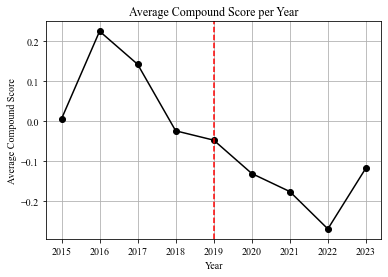

In [16]:

# Set the font family to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Group the data by the 'year' column and calculate the average compound score
average_scores = data.groupby('year_flown')['compound_score'].mean()

# Create a line plot with dark grey color
plt.plot(average_scores.index, average_scores, color='black', marker='o')

# Set the plot title and axes labels
plt.title('Average Compound Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Compound Score')

plt.axvline(x=2019, color='red', linestyle='--')

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()



In [70]:
from scipy import stats

# Split the data into before COVID and during/after COVID periods
before_covid_scores = data[data['year_flown'] < 2020]['compound_score']
during_after_covid_scores = data[data['year_flown'] >= 2020]['compound_score']

# Perform the Mann-Whitney U test to compare the compound scores between the two periods
u_statistic, p_value = stats.mannwhitneyu(before_covid_scores, during_after_covid_scores, alternative='less')

# Print the U statistic, p-value, and conclusion
print('U Statistic:', u_statistic)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant decrease in the compound score before COVID and during/after COVID.")
else:
    print("There is no significant decrease in the compound score before COVID and during/after COVID.")

U Statistic: 19089142.5
p-value: 1.0
There is no significant decrease in the compound score before COVID and during/after COVID.


### (Stacked) Bar plot

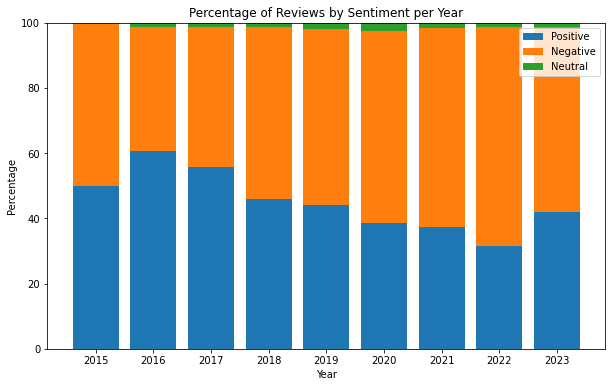

In [51]:
import matplotlib.pyplot as plt

# Group the data by year and overall sentiment and calculate the count
sentiment_counts = data.groupby(['year_flown', 'overall_sentiment']).size().unstack()

# Calculate the total count per year
total_counts = sentiment_counts.sum(axis=1)

# Calculate the percentage of each sentiment per year
percentage_positive = (sentiment_counts['Positive'] / total_counts) * 100
percentage_negative = (sentiment_counts['Negative'] / total_counts) * 100
percentage_neutral = (sentiment_counts['Neutral'] / total_counts) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(percentage_positive.index, percentage_positive, label='Positive')
plt.bar(percentage_negative.index, percentage_negative, bottom=percentage_positive, label='Negative')
plt.bar(percentage_neutral.index, percentage_neutral, bottom=percentage_positive + percentage_negative, label='Neutral')

# Set the plot title and axes labels
plt.title('Percentage of Reviews by Sentiment per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(percentage_positive.index)

# Add a legend
plt.legend()

# Show the plot
plt.show()


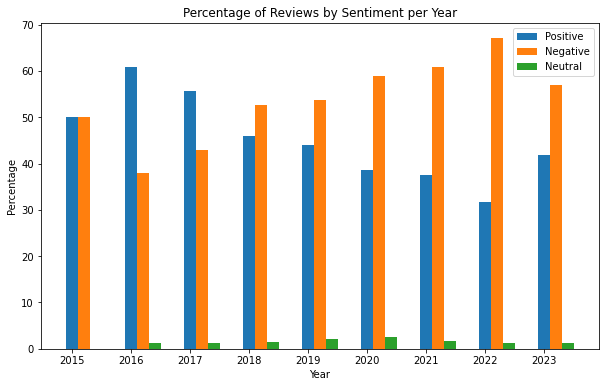

In [54]:
import matplotlib.pyplot as plt

# Group the data by year and overall sentiment and calculate the count
sentiment_counts = data.groupby(['year_flown', 'overall_sentiment']).size().unstack()

# Calculate the total count per year
total_counts = sentiment_counts.sum(axis=1)

# Calculate the percentage of each sentiment per year
percentage_positive = (sentiment_counts['Positive'] / total_counts) * 100
percentage_negative = (sentiment_counts['Negative'] / total_counts) * 100
percentage_neutral = (sentiment_counts['Neutral'] / total_counts) * 100

# Get the unique years in the data and sort them in ascending order
years = sorted(data['year_flown'].unique())

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
bar_positions = [i for i in range(len(years))]

# Plot the bars for each sentiment
plt.bar(bar_positions, percentage_positive, width=bar_width, label='Positive')
plt.bar([p + bar_width for p in bar_positions], percentage_negative, width=bar_width, label='Negative')
plt.bar([p + 2 * bar_width for p in bar_positions], percentage_neutral, width=bar_width, label='Neutral')

# Set the plot title and axes labels
plt.title('Percentage of Reviews by Sentiment per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(bar_positions, years)
plt.legend()

# Show the plot
plt.show()


## Tests for indepence of obs/homogeneity of variance/normality of data

Levene's Test:
Test Statistic: 238.5424814725268
p-value: 2.5085817402780068e-53
Conclusion: There is evidence of heterogeneity of variance.

Shapiro-Wilk Test:
Test Statistic: 0.8245741128921509
p-value: 0.0
Conclusion: The data does not follow a normal distribution.



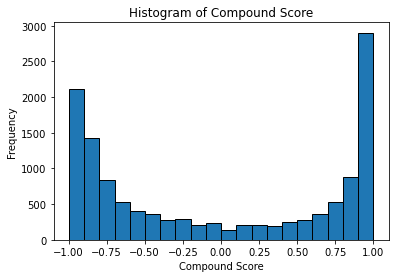

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Homogeneity of variance (Levene's Test)
group1 = data[data['year_flown'] <= 2019]['compound_score']
group2 = data[data['year_flown'] >= 2020]['compound_score']
levene_test_statistic, levene_p_value = stats.levene(group1, group2)
print("Levene's Test:")
print("Test Statistic:", levene_test_statistic)
print("p-value:", levene_p_value)
if levene_p_value < 0.05:
    print("Conclusion: There is evidence of heterogeneity of variance.")
else:
    print("Conclusion: There is no evidence of heterogeneity of variance.")
print()

# Normality of data (Shapiro-Wilk Test)
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data['compound_score'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("Conclusion: The data does not follow a normal distribution.")
else:
    print("Conclusion: The data follows a normal distribution.")
print()

# Histogram of 'compound_score'
plt.hist(data['compound_score'], bins=20, edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Score')
plt.show()


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Homogeneity of variance (Levene's Test)
group1 = data[data['year_flown'] <= 2019]['compound_score']
group2 = data[data['year_flown'] >= 2020]['compound_score']
levene_test_statistic, levene_p_value = stats.levene(group1, group2)
print("Levene's Test:")
print("Test Statistic:", levene_test_statistic)
print("p-value:", levene_p_value)
if levene_p_value < 0.05:
    print("Conclusion: There is evidence of heterogeneity of variance.")
else:
    print("Conclusion: There is no evidence of heterogeneity of variance.")
print()

# Normality of data (Shapiro-Wilk Test)
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data['compound_score'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("Conclusion: The data does not follow a normal distribution.")
else:
    print("Conclusion: The data follows a normal distribution.")
print()

# Histogram of 'compound_score'
plt.hist(data['compound_score'], bins=20, edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Score')
plt.show()


In [72]:
from scipy import stats

# Filter the data for the specified periods
before_covid = data[(data['year_flown'] >= 2015) & (data['year_flown'] <= 2019)]
during_after_covid = data[(data['year_flown'] >= 2020) & (data['year_flown'] <= 2023)]

# Group the data by year and overall sentiment and calculate the count
before_covid_counts = before_covid.groupby(['year_flown', 'overall_sentiment']).size().unstack()
during_after_covid_counts = during_after_covid.groupby(['year_flown', 'overall_sentiment']).size().unstack()

# Calculate the ratio of positive vs negative reviews for each year
before_covid_ratio = round(before_covid_counts['Positive'] / before_covid_counts['Negative'], 3)
during_after_covid_ratio = round(during_after_covid_counts['Positive'] / during_after_covid_counts['Negative'], 3)

# Perform the Mann-Whitney U test to compare the ratios between the two periods
u_statistic, p_value = stats.mannwhitneyu(before_covid_ratio, during_after_covid_ratio, alternative='less')

# Print the calculated ratios, U statistic, p-value, and conclusion
print('Ratio of positive vs negative reviews - Before COVID:')
print(before_covid_ratio)
print('Ratio of positive vs negative reviews - During/After COVID:')
print(during_after_covid_ratio)
print('U Statistic:', u_statistic)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant decrease in the ratio of positive vs negative reviews before COVID and during/after COVID.")
else:
    print("There is no significant decrease in the ratio of positive vs negative reviews before COVID and during/after COVID.")

Ratio of positive vs negative reviews - Before COVID:
year_flown
2015    1.000
2016    1.604
2017    1.296
2018    0.872
2019    0.820
dtype: float64
Ratio of positive vs negative reviews - During/After COVID:
year_flown
2020    0.658
2021    0.615
2022    0.472
2023    0.735
dtype: float64
U Statistic: 20.0
p-value: 1.0
There is no significant decrease in the ratio of positive vs negative reviews before COVID and during/after COVID.


In [71]:
from scipy import stats

# Get the unique values of airlines from the 'airline' column
airlines = data['airline'].unique()

# Create an empty list to store airlines with a significant decrease in compound score
airlines_with_decrease = []

# Filter the data for the specified periods and airlines
before_covid = data[(data['year_flown'] >= 2015) & (data['year_flown'] <= 2019) & (data['airline'].isin(airlines))]
during_after_covid = data[(data['year_flown'] >= 2020) & (data['year_flown'] <= 2023) & (data['airline'].isin(airlines))]

# Group the data by airline, year, and compound score and calculate the mean compound score
before_covid_mean = before_covid.groupby(['airline', 'year_flown'])['compound_score'].mean()
during_after_covid_mean = during_after_covid.groupby(['airline', 'year_flown'])['compound_score'].mean()

# Perform a statistical test
for airline in airlines:
    if airline in before_covid_mean.index and airline in during_after_covid_mean.index:
        before_covid_scores = before_covid_mean.loc[airline].values
        during_after_covid_scores = during_after_covid_mean.loc[airline].values

        _, p_value = stats.ttest_ind(before_covid_scores, during_after_covid_scores)

        if p_value < 0.05:  # Adjust the significance level as needed
            airlines_with_decrease.append(airline)

# Print the list of airlines with a significant decrease in the compound score
print("Airlines with a significant decrease in compound score:")
for airline in airlines_with_decrease:
    print(airline)


Airlines with a significant decrease in compound score:
KLM
Lufthansa
Air France
Turkish Airlines
Swiss International Air Lines
Finn Air


In [63]:
from scipy import stats

# Get the unique values of types of travelers from the 'type_of_traveller' column
travelers = data['type_of_traveller'].unique()

# Create an empty list to store types of travelers with a significant decrease in compound score
travelers_with_decrease = []

# Filter the data for the specified periods and types of travelers
before_covid = data[(data['year_flown'] >= 2015) & (data['year_flown'] <= 2019) & (data['type_of_traveller'].isin(travelers))]
during_after_covid = data[(data['year_flown'] >= 2020) & (data['year_flown'] <= 2023) & (data['type_of_traveller'].isin(travelers))]

# Group the data by type of traveler, year, and compound score and calculate the mean compound score
before_covid_mean = before_covid.groupby(['type_of_traveller', 'year_flown'])['compound_score'].mean()
during_after_covid_mean = during_after_covid.groupby(['type_of_traveller', 'year_flown'])['compound_score'].mean()

# Perform a statistical test
for traveler in travelers:
    if traveler in before_covid_mean.index and traveler in during_after_covid_mean.index:
        before_covid_scores = before_covid_mean.loc[traveler].values
        during_after_covid_scores = during_after_covid_mean.loc[traveler].values

        _, p_value = stats.ttest_ind(before_covid_scores, during_after_covid_scores)

        if p_value < 0.05:  # Adjust the significance level as needed
            travelers_with_decrease.append(traveler)

# Print the list of types of travelers with a significant decrease in the compound score
print("Types of travelers with a significant decrease in compound score:")
for traveler in travelers_with_decrease:
    print(traveler)

Types of travelers with a significant decrease in compound score:
Solo Leisure
Family Leisure


In [7]:
data = pd.read_csv('updated_dataset.csv')
positive_reviews = data[data['overall_sentiment'] == 'Positive']['processed_review']
positive_reviews

0        Used TAP from LGW as no direct flight from Hea...
16       The crew was very nice and attentive, food was...
17       Very nice flight. Left on time despite a very ...
19       Boarding on time all ready and a big fog kept ...
20       What a disgraceful excuse for an airline, I on...
                               ...                        
12630    Total debacle. with Icelandair from Edmonton t...
12631    This was our first experience with Icelandair ...
12633    We were pleasantly surprised with the value an...
12635    The flight from YVR to AMS was delayed by 2 ho...
12636    We flew Washington Dulles to Reykjavik and bac...
Name: processed_review, Length: 5863, dtype: object

# Topic Modelling - LDA

#### 1. Text pre-processing

In [4]:
import spacy
import html
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords
    lemmas_without_stopwords = [lemma for lemma in lemmas if lemma not in stopwords]
    
    return ' '.join(lemmas_without_stopwords)

# Assume `data` is the DataFrame containing the `reviewText` column
data["tm_processed_review"] = data["reviewText"].apply(preprocess_text)

In [6]:
import gensim
from gensim import corpora

# Step 2: Create bigram and trigram models
reviews = data['tm_processed_review'].tolist()
bigram = gensim.models.Phrases(reviews, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[reviews], threshold=100)

In [9]:
# Step 3: Create document-term matrix
# Convert the preprocessed reviews into a list of lists of tokens (words)
tokens = [review.split() for review in reviews]

# Create a dictionary mapping of words to their unique IDs
dictionary = corpora.Dictionary(tokens)

# Filter out too frequent and too rare words from the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the list of tokens into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(review_tokens) for review_tokens in tokens]

In [10]:
# Step 4: Build base model
num_topics = 8
alpha = 'auto'
beta = 'auto'
base_model = gensim.models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    eta=beta
)

Topic 0: 0.020*"seat" + 0.015*"good" + 0.015*"food" + 0.010*"meal" + 0.009*"crew" + 0.009*"class" + 0.009*"service" + 0.008*"time" + 0.008*"cabin" + 0.007*"drink"
Topic 1: 0.025*"bag" + 0.020*"barcelona" + 0.015*"u" + 0.015*"suitcase" + 0.014*"never" + 0.013*"’" + 0.013*"airline" + 0.012*"staff" + 0.011*"luggage" + 0.010*"rude"
Topic 2: 0.021*"airline" + 0.011*"bag" + 0.010*"keflavik" + 0.010*"time" + 0.010*"pay" + 0.010*"luggage" + 0.008*"reykjavik" + 0.008*"check" + 0.007*"boarding" + 0.007*"seat"
Topic 3: 0.014*"u" + 0.013*"told" + 0.012*"’" + 0.010*"day" + 0.010*"would" + 0.010*"get" + 0.009*"ticket" + 0.008*"one" + 0.008*"airport" + 0.008*"hour"
Topic 4: 0.027*"icelandair" + 0.013*"airport" + 0.013*"airline" + 0.013*"time" + 0.013*"hour" + 0.010*"luggage" + 0.010*"service" + 0.010*"day" + 0.010*"gate" + 0.008*"via"
Topic 5: 0.021*"airline" + 0.018*"seat" + 0.012*"service" + 0.010*"swiss" + 0.007*"luggage" + 0.006*"class" + 0.006*"paris" + 0.006*"business" + 0.006*"get" + 0.005*"on

In [ ]:
# Step 5: View the topics
for topic_id, topic_words in base_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

### Removing city names and company names

In [18]:
airlines = data['airline'].unique()
airlines

array(['TAP Portugal', 'EasyJet', 'KLM', 'Lufthansa', 'Ryanair',
       'British Airways', 'Air France', 'Turkish Airlines', 'Norwegian',
       'SAS', 'Iberia', 'Wizz Air', 'ITA Airways',
       'Swiss International Air Lines', 'Aeroflot', 'Virgin Atlantic',
       'Finn Air', 'Brussels Airlines', 'Vueling Airlines', 'Icelandair'],
      dtype=object)

In [11]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to filter out company names and cities from a text
def remove_entities(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.ent_type_ not in ['ORG', 'GPE']:  # Filter out proper nouns that are organizations or locations (cities)
            filtered_text.append(token.text)
    return ' '.join(filtered_text)

# Apply the function to remove entities from the 'tm_processed_review' column
data['filtered_review'] = data['tm_processed_review'].apply(remove_entities)


In [31]:
import re

# List of company names to remove
company_names = ['tap portugal', 'easyjet', 'klm', 'lufthansa', 'ryanair', 
                 'british airways', 'air france', 'turkish airlines', 'norwegian', 
                 'sas', 'iberia', 'wizz air', 'ita airways', 'swiss international air lines', 
                 'aeroflot', 'virgin atlantic', 'finn air', 'brussels airlines', 'vueling airlines', 
                 'icelandair', 'vueling', 'wizz', 'swiss', 'turkish', 'finnair']

# Function to remove company names from a text
def remove_company_names(text):
    for company_name in company_names:
        text = re.sub(company_name, '', text, flags=re.IGNORECASE)
    return text

# Apply the function to remove company names from the 'tm_processed_review' column
data['tm_filtered_review'] = data['tm_processed_review'].apply(remove_company_names)


In [21]:
data['tm_filtered_review'] 

0        used tap lgw direct flight heathrow check quic...
1        enough counter check business class boarding w...
2        never encountered incompetency agent polite sy...
3        flight wa morning time cabin acceptably clean ...
4        flight wa cancelled 1hr departure received tex...
                               ...                        
12633    pleasantly surprised value service provided  t...
12634    roundtrip seattle keflavik mayjune 2016 saga c...
12635    flight yvr wa delayed 2 hour little informatio...
12636    flew washington dulles reykjavik back new year...
12637    oslo keflavik  flight wa time flight entertain...
Name: tm_filtered_review, Length: 12638, dtype: object

In [32]:
import gensim
from gensim import corpora

# Step 2: Create bigram and trigram models
reviews = data['tm_filtered_review'].tolist()
bigram = gensim.models.Phrases(reviews, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[reviews], threshold=100)

In [33]:
# Step 3: Create document-term matrix
# Convert the preprocessed reviews into a list of lists of tokens (words)
tokens = [review.split() for review in reviews]

# Create a dictionary mapping of words to their unique IDs
dictionary = corpora.Dictionary(tokens)

# Filter out too frequent and too rare words from the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the list of tokens into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(review_tokens) for review_tokens in tokens]

In [41]:
# Step 4: Build base model
num_topics = 8
alpha = 'auto'
beta = 'auto'
base_model = gensim.models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    eta=beta
)

alpha_values = base_model.alpha
beta_values = base_model.eta

# Print the values
print("Alpha values:", alpha_values)
print("Beta values:", beta_values)

Alpha values: [0.1409352  0.10741863 0.1241262  0.109906   0.14359662 0.11459377
 0.08706456 0.10122818]
Beta values: [3.243953   5.3488016  2.179627   ... 0.09135859 0.09433649 0.10524299]


In [35]:
# Step 5: View the topics
for topic_id, topic_words in base_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.017*"service" + 0.016*"customer" + 0.013*"seat" + 0.011*"airline" + 0.008*"one" + 0.007*"ticket" + 0.006*"booked" + 0.006*"son" + 0.005*"wife" + 0.005*"return"
Topic 1: 0.025*"bag" + 0.018*"luggage" + 0.016*"check" + 0.014*"airline" + 0.011*"pay" + 0.009*"told" + 0.009*"staff" + 0.009*"u" + 0.008*"seat" + 0.008*"get"
Topic 2: 0.028*"hour" + 0.021*"u" + 0.011*"airport" + 0.011*"airline" + 0.011*"delayed" + 0.011*"plane" + 0.010*"day" + 0.009*"gate" + 0.009*"time" + 0.008*"delay"
Topic 3: 0.022*"seat" + 0.012*"food" + 0.012*"time" + 0.011*"service" + 0.010*"crew" + 0.009*"good" + 0.009*"airline" + 0.008*"cabin" + 0.006*"meal" + 0.006*"plane"
Topic 4: 0.021*"’" + 0.012*"ticket" + 0.011*"customer" + 0.011*"time" + 0.011*"airline" + 0.010*"would" + 0.009*"refund" + 0.009*"get" + 0.009*"service" + 0.008*"told"
Topic 5: 0.019*"class" + 0.016*"seat" + 0.015*"good" + 0.014*"business" + 0.011*"crew" + 0.010*"cabin" + 0.009*"service" + 0.008*"aircraft" + 0.008*"staff" + 0.008*"economy"

#### Medium: https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

In [44]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = data

In [47]:
data_words = data['tm_filtered_review'].tolist()


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['u', 's', 'e', 'd', ' ', 't', 'a', 'p', ' ', 'l', 'g', 'w', ' ', 'd', 'i', 'r', 'e', 'c', 't', ' ', 'f', 'l', 'i', 'g', 'h', 't', ' ', 'h', 'e', 'a', 't', 'h', 'r', 'o', 'w', ' ', 'c', 'h', 'e', 'c', 'k', ' ', 'q', 'u', 'i', 'c', 'k', ' ', 'w', 'a', ' ', 'f', 'a', 's', 't', ' ', 't', 'r', 'a', 'c', 'k', ' ', 's', 'e', 'c', 'u', 'r', 'i', 't', 'y', ' ', 'l', 'o', 'u', 'n', 'g', 'e', ' ', '1', ' ', 'l', 'o', 'u', 'n', 'g', 'e', ' ', 'w', 'a', ' ', 'o', 'k', 'a', 'y', ' ', 'b', 'o', 'a', 'r', 'd', 'i', 'n', 'g', ' ', 'p', 'r', 'e', 't', 't', 'y', ' ', 'o', 'r', 'g', 'a', 'n', 'i', 's', 'e', 'd', ' ', 'q', 'u', 'i', 'c', 'k', 'l', 'y', ' ', 's', 'e', 'a', 't', ' ', 'a', '1', ' ', 'a', '3', ' ', 'b', 'u', 's', 'i', 'n', 'e', 's', 's', ' ', 'c', 'l', 'a', 's', 's', ' ', 't', 'y', 'p', 'i', 'c', 'a', 'l', 'l', 'y', ' ', 'm', 'i', 'd', 'd', 'l', 'e', ' ', 's', 'e', 'a', 't', ' ', 'b', 'l', 'o', 'c', 'k', 'e', 'd', ' ', 'd', 'e', 'p', 'a', 'r', 't', 'e', 'd', ' ', 't', 'i', 'm', 'e', ' ', 'a',

In [52]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['use', 'tap', 'lgw', 'direct', 'flight', 'heathrow', 'check', 'quick', 'fast', 'track', 'security', 'lounge', 'lounge', 'okay', 'boarding', 'pretty', 'organise', 'quickly', 'seat', 'business', 'class', 'typically', 'middle', 'seat', 'block', 'departed', 'time', 'air', 'serve', 'fine', 'crew', 'good', 'extra', 'drink', 'serve', 'arrive', 'time', 'hour', 'wait', 'min', 'bag', 'return', 'economy', 'check', 'quick', 'security', 'use', 'lounge', 'ff', 'status', 'boarding', 'quick', 'flight', 'depart', 'minute', 'late', 'crew', 'fine', 'seat', 'tap', 'many', 'airline', 'serve', 'economy', 'even', 'water', 'understand', 'otherwise', 'trip', 'wa', 'good', 'use', 'tap', 'flight', 'previous', 'month', 'hesitate', 'let', 'check', 'experience', 'agent', 'speak', 'actually', 'look', 'fall', 'bed', 'sum', 'dreadful', 'airport']]


In [53]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 3), (51, 2), (52, 3), (53, 1), (54, 1), (55, 1), (56, 3), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1)]]


In [58]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [59]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"plane" + 0.035*"delay" + 0.029*"passenger" + 0.026*"hour" + '
  '0.024*"staff" + 0.022*"boarding" + 0.021*"minute" + 0.020*"take" + '
  '0.020*"time" + 0.017*"wait"'),
 (1,
  '0.093*"pay" + 0.049*"seat" + 0.038*"ticket" + 0.037*"cost" + '
  '0.037*"airline" + 0.035*"extra" + 0.030*"price" + 0.027*"charge" + '
  '0.024*"iceland" + 0.022*"buy"'),
 (2,
  '0.061*"customer" + 0.048*"call" + 0.043*"service" + 0.031*"cancel" + '
  '0.029*"email" + 0.026*"receive" + 0.025*"day" + 0.023*"refund" + '
  '0.020*"phone" + 0.019*"send"'),
 (3,
  '0.039*"seat" + 0.035*"flight" + 0.024*"good" + 0.023*"service" + '
  '0.022*"food" + 0.019*"crew" + 0.017*"cabin" + 0.016*"fly" + 0.015*"wa" + '
  '0.014*"well"'),
 (4,
  '0.045*"cancellation" + 0.023*"cut" + 0.020*"frequent" + 0.020*"assure" + '
  '0.020*"music" + 0.017*"warn" + 0.017*"fair" + 0.016*"baby" + '
  '0.015*"glasgow" + 0.014*"test"'),
 (5,
  '0.080*"flight" + 0.028*"get" + 0.023*"airline" + 0.022*"hour" + 0.019*"fly" '
  '+ 0.017

In [67]:
df = data

In [68]:

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Convert to list
data = df.processed_review.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Used TAP from LGW as no direct flight from Heathrow, check in quick as was '
 'fast track security the lounge No 1 lounge was okay. Boarding pretty '
 'organised so quickly at our seats A1 & A3 business class typically middle '
 'seat blocked, departed on time once in the air lunch served which was fine. '
 'Crew where good with extra drinks served arrived on time after 2 hours and '
 'waited 20 min for bags. Returned in economy check in quick as was security, '
 'used the lounge through my FF status boarding quick and the flight departed '
 'about 20 minutes late. Crew where fine as where the seats A4 & B4, TAP like '
 'many airlines in Europe serve nothing in economy not even water which I dont '
 'understand, otherwise the trip was good and having used TAP on 4 flights '
 'over the previous 6 months I wouldnt hesitate to use them again. Only let '
 'down was the check in experience at Gatwick, the agent didnt speak once she '
 'actually looked like she had just fallen out of bed, 

In [72]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['used', 'tap', 'from', 'lgw', 'as', 'no', 'direct', 'flight', 'from', 'heathrow', 'check', 'in', 'quick', 'as', 'was', 'fast', 'track', 'security', 'the', 'lounge', 'no', 'lounge', 'was', 'okay', 'boarding', 'pretty', 'organised', 'so', 'quickly', 'at', 'our', 'seats', 'business', 'class', 'typically', 'middle', 'seat', 'blocked', 'departed', 'on', 'time', 'once', 'in', 'the', 'air', 'lunch', 'served', 'which', 'was', 'fine', 'crew', 'where', 'good', 'with', 'extra', 'drinks', 'served', 'arrived', 'on', 'time', 'after', 'hours', 'and', 'waited', 'min', 'for', 'bags', 'returned', 'in', 'economy', 'check', 'in', 'quick', 'as', 'was', 'security', 'used', 'the', 'lounge', 'through', 'my', 'ff', 'status', 'boarding', 'quick', 'and', 'the', 'flight', 'departed', 'about', 'minutes', 'late', 'crew', 'where', 'fine', 'as', 'where', 'the', 'seats', 'tap', 'like', 'many', 'airlines', 'in', 'europe', 'serve', 'nothing', 'in', 'economy', 'not', 'even', 'water', 'which', 'dont', 'understand', 'oth

In [75]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['use tap lgw direct flight heathrow check in quick fast track security lounge lounge okay boarding pretty organise so quickly seat business class typically middle seat block depart time once air lunch serve fine crew good extra drink serve arrive time hour wait min bag return economy check in quick security use lounge ff status boarding quick flight depart minute late crew fine seat tap many airline serve economy even water understand otherwise trip good use tap flight previous month hesitate use again only let check experience agent speak actually look just fall bed sum dreadful airport', 'be enough counter check business class boarding disaster plane gate rather long drive bus necessary old very hard seat business class ticket go bus first captain give information before also flight inflight service extremely poor most scandalous business class plate cold stuff slice dark stale bread roll all extremely poor limited choice drink hour flight just drink fa very neutral happy flight ove

In [76]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [77]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.2223478170056703 %


In [83]:
num_topics = 8

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components= num_topics,  # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=8, n_jobs=-1,
                          random_state=100)


In [85]:
# Get the topic-word matrix
topic_word_matrix = lda_model.components_

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names()

# Print the topics and associated words
num_top_words = 10  # Number of words to display for each topic
for topic_idx, topic in enumerate(topic_word_matrix):
    print(f"Topic #{topic_idx}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    print(" ".join(top_words))
    print()


Topic #0:
flight ticket book airline pay cancel change refund customer time

Topic #1:
flight hour time delay plane passenger minute gate boarding late

Topic #2:
luggage tell staff ask say check bag airport wait baggage

Topic #3:
flight day hour hotel delay customer airport tell claim miss

Topic #4:
swiss visa covid test ist transit need english plastic passenger

Topic #5:
check pay bag luggage ryanair extra charge boarding carry fly

Topic #6:
seat flight good food class service business crew cabin economy

Topic #7:
airline service fly bad flight cost customer vuele experience staff



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -4839836.98059634
Perplexity:  757.6507116989355
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 8,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}
